First, let us import and define everything that is needed. The functions tokenizer_porter(), tokenizer(), and preprocessor() are from the textbook, and will clean our data and tokenize our data for text classification.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [3]:
porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [4]:
def tokenizer(text):
    return text.split()

In [5]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                       text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')) 
    return text

Now, let us import our data, which are from Kaggle and Github.

In [153]:
df1 = pd.read_csv("book_quotes.csv",header=None,encoding='utf-8')
df1.head()

,0,1,2,3,4
0,NaN,Quote,Author,Main Tag,Other Tags
1,0.0,“Control of consciousness determines the quali...,"― Mihaly Csikszentmihalyi, Flow: The Psycholog...",happiness,"[' consciousness, happiness, quality-of-life']"
2,1.0,“Copulation is no more foul to me than death is.”,"― Walt Whitman, Leaves of Grass: The First (18...",death,"[' death, sex']"
3,2.0,“Hope is a dream of which we long to have. Don...,"― Peace Gypsy, Souls Deep",happiness,"[' dreamers, dreams, happiness, love, peace']"
4,3.0,“True devotion and humility is when you carele...,― Michael Bassey Johnson,truth,"[' acceptance, achilles-heel, admiration, affe..."


In [154]:
df2 = pd.read_csv("elder_scrolls_dialogue.csv",header=None,encoding='utf-8')
df2.head()

,0,1,2,3,4,5,6,7,8,9,10
0,_key,game/0,url,description,author,title,text,game/1,game/2,game/3,series
1,https://www.imperial-library.info/content/dyin...,Morrowind,https://www.imperial-library.info/content/dyin...,The last words of a world-renowned archaeolog...,Indie,A Dying Man's Last Words,It's been many days since the collapse. I have...,NaN,NaN,NaN,NaN
2,https://www.imperial-library.info/content/fair...,Morrowind,https://www.imperial-library.info/content/fair...,Fair warning to those who would enter the Grea...,Cumanya,A Fair Warning,This being an account of my limited journeys i...,NaN,NaN,NaN,NaN
3,https://www.imperial-library.info/content/game...,Morrowind,https://www.imperial-library.info/content/game...,A published letter from an anonymous spy about...,Anonymous,A Game at Dinner,A GAME AT DINNER\r\nby\r\nAn Anonymous Spy\r\n...,Oblivion,Skyrim,NaN,NaN
4,https://www.imperial-library.info/content/hypo...,Morrowind,https://www.imperial-library.info/content/hypo...,An amusing play about a bunch of backstabbing ...,Anthil Morvir,A Hypothetical Treachery,A Hypothetical Treachery\r\nA One Act Play\r\n...,Oblivion,Skyrim,NaN,NaN


In [155]:
df3 = pd.read_csv("movie_catchphrases.csv",header=None,encoding='utf-8')
df3.head()

,0,1,2
0,Catchphrase,Movie Name,Context
1,"Beetlejuice, Beetlejuice, Beetlejuice!",BEETLEJUICE,"Lydia, summoning Beetlejuice"
2,It's showtime!,BEETLEJUICE,"Beetlejuice, being summoned."
3,They're heeeere!,POLTERGEIST,"Carol Anne Freeling, notifying her parents of..."
4,Hey you guys!,THE GOONIES,"Sloth, calling the attention of the children ..."


In [156]:
df4 = pd.read_csv("movie_lines.csv",header=None,encoding='utf-8')
df4.head()

/var/folders/cz/nvn3m4_17v7_bq36f06k_lk40000gn/T/ipykernel_40730/2169253767.py:1: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,26,27,28,31,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv("movie_lines.csv",header=None,encoding='utf-8')


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,L1045,u0,m0,BIANCA,They do not!,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,L1044,u2,m0,CAMERON,They do to!,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,L985,u0,m0,BIANCA,I hope so.,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,L984,u2,m0,CAMERON,She okay?,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,L925,u0,m0,BIANCA,Let's go.,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
df5 = pd.read_csv("movie_quotes.csv",header=None,encoding='utf-8')
df5.head()

,0,1,2,3
0,#,QUOTE,MOVIE,YEAR
1,1,"Frankly, my dear, I don't give a damn.",GONE WITH THE WIND,1939
2,2,I'm gonna make him an offer he can't refuse.,THE GODFATHER,1972
3,3,You don't understand! I coulda had class. I co...,ON THE WATERFRONT,1954
4,4,"Toto, I've a feeling we're not in Kansas anymore.",THE WIZARD OF OZ,1939


In [158]:
df6 = pd.read_csv("star_wars_dialogue.csv",header=None,encoding='utf-8')
df6.head()

,0,1,2,3,4,5,6,7,8,9
0,id,speaker,listener,text,animation,comment,next,previous,source_dlg,audiofile
1,0,Anchorhead Tradesman,NaN,Take care of yourself. The price of kolto tank...,[],NaN,[],[None],tat17_news_01,NM17AANEWS11000_.mp3
2,1,Anchorhead Tradesman,NaN,The Selkath put a bunch of export restrictions...,[],NaN,[],[None],tat17_news_01,NM17AANEWS11001_.mp3
3,2,Anchorhead Tradesman,NaN,I hear that Manaan is no longer shipping kolto...,[],NaN,[],[None],tat17_news_01,NM17AANEWS11002_.mp3
4,3,Anchorhead Tradesman,NaN,"If you have kolto tanks, use them sparingly. I...",[],NaN,[],[None],tat17_news_01,NM17AANEWS11003_.mp3


In [159]:
df7 = pd.read_csv("torchlight_dialogue.csv",header=None,encoding='utf-8')
df7.head()

,0,1,2,3,4,5,6,7,8
0,speaker,text,dialogtype,quest_displayname,quest_name,questfile,speaker_unit,unitfile,raw_text
1,Felicia,You seem weary - perhaps you are in need of a ...,complete,The Adventure Continues,global_newgameplus,QUESTS/GLOBAL_NEWGAMEPLUS.DAT,RETIREMENTCHARACTERQUEST,MEDIA/UNITS/MONSTERS/NPC/RETIREMENTCHARACTERQU...,You seem weary - perhaps you are in need of a ...
2,Bounty Board,BOUNTY!\nThe Sturmbeorn raiders are a threat t...,intro,Bounty: Sturmbeorn!,a1z1-bountyboard2,QUESTS/A1Z1-BOUNTYBOARD2.DAT,BOUNTYBOARD,MEDIA/UNITS/MONSTERS/BOUNTYBOARD/BOUNTYBOARD.DAT,BOUNTY!\n\nThe Sturmbeorn raiders are a threat...
3,Bounty Board,The Sturmbeorn have been conducting raids in n...,return,Bounty: Sturmbeorn!,a1z1-bountyboard2,QUESTS/A1Z1-BOUNTYBOARD2.DAT,BOUNTYBOARD,MEDIA/UNITS/MONSTERS/BOUNTYBOARD/BOUNTYBOARD.DAT,The Sturmbeorn have been conducting raids in n...
4,Bounty Board,The Empire thanks you for your valuable servic...,complete,Bounty: Sturmbeorn!,a1z1-bountyboard2,QUESTS/A1Z1-BOUNTYBOARD2.DAT,BOUNTYBOARD,MEDIA/UNITS/MONSTERS/BOUNTYBOARD/BOUNTYBOARD.DAT,The Empire thanks you for your valuable servic...


Let us see how much data we have.

In [13]:
num_of_book_lines = len(df1)
num_of_book_lines

30001

In [14]:
num_of_movie_lines = len(df3) + len(df4) + len(df5)
num_of_movie_lines

293620

In [15]:
num_of_videogame_lines = len(df2) + len(df6) + len(df7)
num_of_videogame_lines

35670

There's a lot of data, so let's create a new dataset with 500 randomly chosen lines of dialogue from each category. Let's see how high the accuracy can be on a subset of the data.

In [160]:
# First, let's drop the column labels in row 0 to make sure we don't select those for training.
df1 = df1.drop([0,1])
df2 = df2.drop([0,1])
df3 = df3.drop([0,1])
df4 = df4.drop([0,1])
df5 = df5.drop([0,1])
df6 = df6.drop([0,1])
df7 = df7.drop([0,1])

We only have one dataset for books, so let's randomly select 500 quotes from the dataset. We want to drop irrelevant columns, rename the last column, and add a new column for the type of entertainment. Let books be Class 0.

In [161]:
df_books_subset = df1.sample(n = 500)
df_books_subset = df_books_subset.drop(df_books_subset.iloc[:, 0:1],axis = 1)
df_books_subset = df_books_subset.drop(df_books_subset.iloc[:, 1:5],axis = 1)
df_books_subset.columns = [0]
df_books_subset[1] = 0
df_books_subset.head()

,0,1
26204,“A man craves ultimate truths. Every mortal mi...,0
23553,"“In our twenties, when there is still so much ...",0
19103,"“The fact that, in the United States, there ar...",0
18846,“An unrealistic understanding of what living i...,0
21066,“There are some in science who claim time does...,0


The indicies are not in order, because we randomly selected data from the original dataset. Let us reset the indices so that the dataframe is easier to read. By doing so, we will create a new column that has the original indices--we don't need that, so let us drop that column.

In [162]:
df_books_subset = df_books_subset.reset_index()
df_books_subset = df_books_subset.drop(df_books_subset.iloc[:, 0:1],axis = 1)
df_books_subset.head()

,0,1
0,“A man craves ultimate truths. Every mortal mi...,0
1,"“In our twenties, when there is still so much ...",0
2,"“The fact that, in the United States, there ar...",0
3,“An unrealistic understanding of what living i...,0
4,“There are some in science who claim time does...,0


It gets more complicated for the movie and video-game datasets, because we have more than one for each type. For the movie datasets, let's take all of the data from the first and third, and the rest from the second. We will wrangle the data exactly as before (dropping unnecessary columns, fixing the indices, selecting random data).

In [19]:
print("Movie dataset 1: " , len(df3))
print("Movie dataset 2: " , len(df4))
print("Movie dataset 3: " , len(df5))

Movie dataset 1:  149
Movie dataset 2:  293366
Movie dataset 3:  99


In [163]:
df3 = df3.drop(df3.columns[[1,2]], axis = 1)
df3.head()

,0
2,It's showtime!
3,They're heeeere!
4,Hey you guys!
5,"Good morning, Vietnam!"
6,I love the smell of napalm in the morning. You...


In [164]:
df4 = df4.drop(df4.iloc[:, 0:4],axis = 1)
df4 = df4.drop(df4.iloc[:, 1:36],axis = 1)

In [165]:
df4.head()

,4
2,I hope so.
3,She okay?
4,Let's go.
5,Wow
6,Okay -- you're gonna need to learn how to lie.


In [166]:
df5 = df5.drop(df5.iloc[:, 0:1],axis = 1)
df5 = df5.drop(df5.iloc[:, 1:5],axis = 1)

In [167]:
df5.head()

,1
2,I'm gonna make him an offer he can't refuse.
3,You don't understand! I coulda had class. I co...
4,"Toto, I've a feeling we're not in Kansas anymore."
5,"Here's looking at you, kid."
6,"Go ahead, make my day."


In [168]:
df3.columns = [0]
df4.columns = [0]
df5.columns = [0]

In [101]:
df4_subset = df4.sample(n = 500 - len(df3) - len(df5))

Here, we will use the concat() function from pandas to stack the three datasets on top of each other.

In [27]:
df_movies_subset = pd.concat([df3, df4_subset, df5], ignore_index=True)

Let movies be Class 1.

In [28]:
df_movies_subset[1] = 1
df_movies_subset.tail()

,0,1
495,Snap out of it!,1
496,My mother thanks you. My father thanks you. My...,1
497,Nobody puts Baby in a corner.,1
498,"I'll get you, my pretty, and your little dog, ...",1
499,I'm the king of the world!,1


Now, we will do the exact same thing to the video-game datasets. Since each one has many lines of dialogue, let us take divide the 500 total lines equally across the three datasets.

In [169]:
df2 = df2.drop(df2.iloc[:, 0:6],axis = 1)
df2 = df2.drop(df2.iloc[:, 1:5],axis = 1)

In [170]:
df2_subset = df2.sample(n = 166)
df2_subset = df2_subset.reset_index()
df2_subset = df2_subset.drop(df2_subset.iloc[:, 0:1],axis = 1)
df2_subset.columns = [0]
df2_subset.tail()

,0
161,"They made no demands, gave no hints of their g..."
162,"""In Mundus, conflict and disparity are what br..."
163,Verandis and his thirst for knowledge and rese...
164,Ahnissi tells you. You are no longer a mewing ...
165,Do not pity the lawbreaker.\r\n\tTheir fate is...


In [171]:
df6 = df6.drop(df6.iloc[:, 0:3],axis = 1)
df6 = df6.drop(df6.iloc[:, 1:7],axis = 1)

df6_subset = df6.sample(n = 166)
df6_subset = df6_subset.reset_index()
df6_subset = df6_subset.drop(df6_subset.iloc[:, 0:1],axis = 1)
df6_subset.columns = [0]

In [105]:
df6_subset.tail()

,0
161,"The will of the One cannot be denied, Interlop..."
162,I recognize you - you're that new duelist ever...
163,"Well, that is impressive. I don't get many of ..."
164,"Do you hear that, my master? That is the sound..."
165,"Ahhh, so you are just another hopeful after al..."


In [172]:
df7 = df7.drop(df7.iloc[:, 0:8],axis = 1)

df7_subset = df7.sample(n = 167)
df7_subset = df7_subset.reset_index()
df7_subset = df7_subset.drop(df7_subset.iloc[:, 0:1],axis = 1)
df7_subset.columns = [0]

In [107]:
df7_subset.tail()

,0
162,Now that you have defeated the Ezrohir sorcere...
163,There's a rumor that the Ezrohir have defeated...
164,What brought you back here? Are the Sturmbeor...
165,"Thank you again, my friend. When we've recove..."
166,You have lifted the curse I brought upon mysel...


In [173]:
df2.columns = [0]
df6.columns = [0]
df7.columns = [0]

In [36]:
df_games_subset = pd.concat([df2_subset, df6_subset, df7_subset], ignore_index=True)

Let video games be Class 2.

In [37]:
df_games_subset[1] = 2
df_games_subset.tail()

,0,1
494,Why can't Fazeer Shah just open a portal into ...,2
495,"Things are pretty safe here, now. How are thi...",2
496,You've been out there. You've faced the Ezroh...,2
497,Activate the |cFFD1FF7AArmory Portal|u in the ...,2
498,I have always been led to believe that the Gua...,2


Now, let us take the new datasets for books, movies, and video games, and combine them into one overall dataset for our model to use.

In [38]:
df_combined_subset = pd.concat([df_books_subset, df_movies_subset, df_games_subset], ignore_index=True)

In [39]:
df_combined_subset.tail()

,0,1
1494,Why can't Fazeer Shah just open a portal into ...,2
1495,"Things are pretty safe here, now. How are thi...",2
1496,You've been out there. You've faced the Ezroh...,2
1497,Activate the |cFFD1FF7AArmory Portal|u in the ...,2
1498,I have always been led to believe that the Gua...,2


Notice that there is an order to our data--books are first, movies are second, and video games are third. This may impact training, so let us scramble all of the data by selecting all of it in random order.

In [40]:
df_combined_subset = df_combined_subset.sample(n = len(df_combined_subset))

Let us all rename our columns so that the dataframe is easier to use.

In [41]:
df_combined_subset.rename(columns = {0:'line', 1: 'type'}, inplace = True)

Let us ensure that the data in the column 'line' are all Strings. 

In [42]:
df_combined_subset['line'] = df_combined_subset['line'].astype(str)

Now, let us run a preprocessor() function on all of our quotes. This ensures that our data is "clean," and that every character remaining is useful for the model.

In [43]:
df_combined_subset['line'] = df_combined_subset['line'].apply(preprocessor)

Now, let us create our X and y, and use sklearn to split them into testing and training sets.

In [44]:
X = df_combined_subset['line'].values
y = df_combined_subset['type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

From online research, it looks like 3 common models for text classfication are Logistic Regression, SVM, and Naive Bayes (https://github.com/nlptown/nlp-notebooks/blob/master/Traditional%20text%20classification%20with%20Scikit-learn.ipynb). We did not learn about the last model in class. It is based off of Bayes' Theorem, which predicts the probablity of event A, given the fact that event B has occured (https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c). It assumes that features are independent from one another, i.e., feature A does not affect feature B. Our data satisfies this requirement, because we only have one feature to use in our classification.

While text classification is a common task for machine learning, I was not able to find previous models that classified entertainment types. This is the main reason why I had to combine so many datasets for my final project. Instead of classifying between entertainment types, other models classified between genres of one type. For example, in 2019, masters' student Amr Shahin at Concordia University classified the genres of movies by using their scripts (https://spectrum.library.concordia.ca/id/eprint/985410/1/Shahin_MSc_S2019.pdf.pdf). Using HAN ("hierarchical attention network") and CNN models, he was able to achieve accuracy scores ranging from 88-95%. Since I could not find previous experiments of my task, I determined that I would call my final project a success if my accuracy score reached 70% (lower than Shahin's accuracy, yet still better than a coin flip).

For all models, my dataset will be transformed from text to TF-IDF features using the TfidVectorizer() function from sklearn. TF-IDF stands for "term frequency" and "inverse document frequency." The former term is self-explanatory: the feature keeps count of how many times a word appears in an instance of the data. The latter term measures the "relative rarity of a term" throughout all instances of the data. Thus, TF-IDF "uses the frequency of words to determine how relevant those words are to a given document" (https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/). Alternatives to TF-IDF is the "bag-of-words" approach, which simply counts the frequencies of each word, and the BERT (Bidirectional Encoder Representations from Transformers) approach, which builds upon TF-IDF to include the semantic meanings of words. The former was taught in class, and the latter was suggested by Will Wang. I have chosen to use TF-IDF because it was used in a text-classification problem in the textbook.

Let us first test logistic regression on our subset of data.

In the textbook, they performed a grid search before using a model. Let us do the same. By performing grid search, we will find the optimal set of hyperparameters for our model. For our grid search, we will also tokenize our lines (so that the model can analyze word by word instead of sentence by sentence), or use the Porter stemming algorithm to reduce words to their "root form" (ex. running -> run). We will also include the option of removing stopwords in English, which are common and unhelpful words, such as "and." 

I did want to include more parameters, but was limited by the amount of computation power. I chose those we talked about in class, as well as the ones included in the textbook. The original code and idea came from the textbook.

In [47]:
stop = stopwords.words('english')
tfidf = TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None)

param_grid = [
{
'vect__ngram_range': [(1, 1)],
'vect__stop_words': [None],
'vect__tokenizer': [tokenizer, tokenizer_porter],
'clf__penalty': ['l2', 'l1'],
'clf__C': [0.01, 0.1, 1, 10, 100],
'clf__solver': ['liblinear', 'newton-cg', 'sag'],
'clf__multi_class': ['ovr', 'multinomial']
},
{
'vect__ngram_range': [(1, 1)],
'vect__stop_words': [stop, None],
'vect__tokenizer': [tokenizer],
'vect__use_idf':[False],
'vect__norm':[None],
'clf__penalty': ['l2', 'l1'],
'clf__C': [0.01, 0.1, 1, 10, 100],
'clf__solver': ['liblinear', 'newton-cg', 'sag'],
'clf__multi_class': ['ovr', 'multinomial']
},
]

logistic_regression_tfidf = Pipeline([('vect', tfidf), ('clf', LogisticRegression())])

grid_search = GridSearchCV(logistic_regression_tfidf, param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END clf__C=0.01, clf__multi_class=ovr, clf__penalty=l2, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.1s
[CV] END clf__C=0.01, clf__multi_class=ovr, clf__penalty=l2, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.1s
[CV] END clf__C=0.01, clf__multi_class=ovr, clf__penalty=l2, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.1s
[CV] END clf__C=0.01, clf__multi_class=ovr, clf__penalty=l2, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.1s
[CV] END clf__C=0.01, clf__multi_class=ovr, clf__penalty=l2, clf__solver=newton-cg, vect__ngram_range=(1

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l1, clf__solver=liblinear, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   1.6s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l1, clf__solver=liblinear, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   1.9s
[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l1, clf__solver=liblinear, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.0s
[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l1, clf__solver=liblinear, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.0s
[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l1, clf__solver=liblinear, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.0s
[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l1, clf__solver=liblinear, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l1, clf__solver=liblinear, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time=   2.4s
[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l1, clf__solver=liblinear, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time=   0.6s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l1, clf__solver=liblinear, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time=   2.1s
[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l1, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.0s
[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l1, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.0s
[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l1, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.0s
[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l1, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total 

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/p

[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.1s
[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.1s
[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.1s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time=   0.6s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time=   0.7s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time=   0.6s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time=   0.7s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time=   0.7s
[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.0s
[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.0s
[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.0s
[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=100, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.1s
[CV] END clf__C=100, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.1s
[CV] END clf__C=100, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.1s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=100, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time=   0.6s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=100, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time=   0.6s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=100, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time=   0.6s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=100, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time=   0.6s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=100, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time=   0.6s
[CV] END clf__C=100, clf__multi_class=multinomial, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.0s
[CV] END clf__C=100, clf__multi_class=multinomial, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.0s
[CV] END clf__C=100, clf__multi_class=multinomial, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.0s
[CV] END clf__C=100, clf__multi_class=multinomial, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__stop_words=None,

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/p

[CV] END clf__C=0.01, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how'

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/p

[CV] END clf__C=0.01, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how'

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/p

[CV] END clf__C=0.01, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=0.01, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=0.01, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=0.01, clf__multi_class=ovr, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=0.01, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=0.01, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=0.01, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=0.01, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=0.01, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=0.01, clf__multi_class=multinomial, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'fo

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/p

[CV] END clf__C=0.1, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/p

[CV] END clf__C=0.1, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=0.1, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=0.1, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/p

[CV] END clf__C=0.1, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=0.1, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=0.1, clf__multi_class=ovr, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those'

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=0.1, clf__multi_class=ovr, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.0s
[CV] END clf__C=0.1, clf__multi_class=ovr, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.0s
[CV] END clf__C=0.1, clf__multi_class=ovr, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.0s
[CV] END clf__C=0.1, clf__multi_class=ovr, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.0s
[CV] END clf__C=0.1,

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=0.1, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why'

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=0.1, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why'

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=0.1, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=0.1, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=0.1, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=0.1, clf__multi_class=multinomial, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/p

[CV] END clf__C=1, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', '

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/p

[CV] END clf__C=1, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', '

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/p

[CV] END clf__C=1, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=1, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=1, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=1, clf__multi_class=ovr, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=1, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=1, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=1, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=1, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=1, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=1, clf__multi_class=multinomial, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'w

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/p

[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/p

[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/p

[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=10, clf__multi_class=ovr, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', '

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=10, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=10, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=10, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=10, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=10, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=10, clf__multi_class=multinomial, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'you

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l2, clf__solver=liblinear, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l2, clf__solver=liblinear, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l2, clf__solver=liblinear, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/p

[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/p

[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/p

[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/p

[CV] END clf__C=100, clf__multi_class=ovr, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=100, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why'

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=100, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why'

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END clf__C=100, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=100, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=100, clf__multi_class=multinomial, clf__penalty=l2, clf__solver=sag, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=   0.1s
[CV] END clf__C=100, clf__multi_class=multinomial, clf__penalty=l1, clf__solver=newton-cg, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 146

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf', LogisticRegression())]),
             n_jobs=1,
             param_grid=[{'clf__C': [0.01, 0.1, 1, 10, 100],
                          'clf__multi_class': ['ovr', 'multinomial'],
                          'clf__penalty': ['l2', 'l1'],
                          'clf__solver': ['newton-cg', 'liblinear', 'sag'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [None],
                          'vect__tokeniz...
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                      

Here is the best parameter set that our Grid Search found. 

In [48]:
print(f'Best parameter set: {grid_search.best_params_}')

Best parameter set: {'clf__C': 10, 'clf__multi_class': 'ovr', 'clf__penalty': 'l2', 'clf__solver': 'newton-cg', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x7fbc905e8c10>}


Let us look at the confusion matrix, the classification report, and the accuracy score.

We can see that our model has achieved an accuracy score of 72.8%. The scores for precision, recall, and f1-score all hover around 70%. Thus, the model does not make more mistakes with one type than the other (such as false positives vs. false negatives).

The performance of our model can be seen in the confusion matrix, in which the light green and yellow colors indicate the highest frequencies of predictions and the purple color indicates the lowest frequencies. The clear diagonal line shows that our model is correct for most of the time.

In [49]:
clf = grid_search.best_estimator_
y_pred = clf.predict(X_test)
print("Classification Report: \n", classification_report(y_test,y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.71      0.72       143
           1       0.69      0.72      0.70       150
           2       0.77      0.75      0.76       157

    accuracy                           0.73       450
   macro avg       0.73      0.73      0.73       450
weighted avg       0.73      0.73      0.73       450

Accuracy Score:  0.7288888888888889


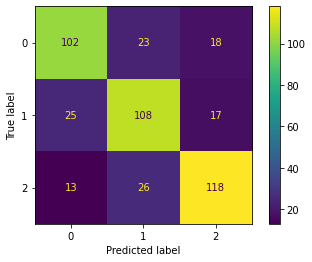

In [50]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Let's train the model on the entire dataset now. If it achieves a higher accuracy score, then we will implement and train the remaining models (random forest, support vector machine, and naive bayesian) on the entire dataset. If not, then we will train the models on the subsets that were defined before. 

In [174]:
# Let's start with the books
df_books = df1
df_books = df_books.drop(df_books.iloc[:, 0:1],axis = 1)
df_books = df_books.drop(df_books.iloc[:, 1:5],axis = 1)
df_books.columns = [0]
df_books[1] = 0
df_books = df_books.reset_index()
df_books = df_books.drop(df_books.iloc[:, 0:1],axis = 1)
df_books.tail()

,0,1
29994,"“To be, or not to be: that is the question:",0
29995,“I always think of each night as a song. Or ea...,0
29996,“It's not what I'd want for at my funeral. Whe...,0
29997,“Người quyết tâm đào tạo cho mình một đời sống...,0
29998,"“I believe that to be an efficient writer, one...",0


In [175]:
# Then, move on to the movies.
df_movies = pd.concat([df3, df4, df5], ignore_index=True)
df_movies[1] = 1
df_movies.tail()

,0,1
293609,Snap out of it!,1
293610,My mother thanks you. My father thanks you. My...,1
293611,Nobody puts Baby in a corner.,1
293612,"I'll get you, my pretty, and your little dog, ...",1
293613,I'm the king of the world!,1


In [176]:
# Finally, create the video-game dataset.
df_games = pd.concat([df2, df6, df7], ignore_index=True)
df_games[1] = 2
df_games.tail()

,0,1
35659,"- Locate the ""|cFFD1FF7ANether-Rift|u"" in the ...",2
35660,"- Close the ""|cFFD1FF7ANether-Rift|u""",2
35661,Somebody help me!,2
35662,Thanks for your help. Here ... something for ...,2
35663,Defeat the monsters attacking the traveler's w...,2


In [113]:
# Create the combined dataset.
df_all = pd.concat([df_books, df_movies, df_games], ignore_index=True)
df_all.tail()

,0,1
359272,"- Locate the ""|cFFD1FF7ANether-Rift|u"" in the ...",2
359273,"- Close the ""|cFFD1FF7ANether-Rift|u""",2
359274,Somebody help me!,2
359275,Thanks for your help. Here ... something for ...,2
359276,Defeat the monsters attacking the traveler's w...,2


In [115]:
# Once again, let us scramble the data so that there is no order to the classes, rename the columns, convert 
# entry to a string, and apply the preprocessor() function.
df_all = df_all.sample(n = len(df_all))
df_all.rename(columns = {0:'line', 1: 'type'}, inplace = True)
df_all['line'] = df_all['line'].astype(str)
df_all['line'] = df_all['line'].apply(preprocessor)

In [116]:
X = df_all['line'].values
y = df_all['type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Now, let us train a logistic regression model in the same way as before. It is going to take a much longer time,
due to the amount of data.

In [117]:
param_grid = [
{
'vect__ngram_range': [(1, 1)],
'vect__stop_words': [None],
'vect__tokenizer': [tokenizer, tokenizer_porter],
'clf__penalty': ['l2'],
'clf__C': [1, 10]
},
{
'vect__ngram_range': [(1, 1)],
'vect__stop_words': [stop, None],
'vect__tokenizer': [tokenizer],
'vect__use_idf':[False],
'vect__norm':[None],
'clf__penalty': ['l2'],
'clf__C': [1, 10]
},
]

logistic_regression_tfidf = Pipeline([('vect', tfidf), ('clf', LogisticRegression(solver='liblinear'))])

grid_search = GridSearchCV(logistic_regression_tfidf, param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=1)


grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END clf__C=1, clf__penalty=l2, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   5.1s
[CV] END clf__C=1, clf__penalty=l2, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   6.0s
[CV] END clf__C=1, clf__penalty=l2, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   5.5s
[CV] END clf__C=1, clf__penalty=l2, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   5.1s
[CV] END clf__C=1, clf__penalty=l2, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   5.0s
[CV] END clf__C=1, clf__penalty=l2, vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=1, clf__penalty=l2, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'mo

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=1, clf__penalty=l2, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'mo

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=1, clf__penalty=l2, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'mo

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=1, clf__penalty=l2, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=  31.3s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=1, clf__penalty=l2, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=  32.9s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=1, clf__penalty=l2, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=  30.7s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=1, clf__penalty=l2, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=  33.2s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=1, clf__penalty=l2, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=  33.8s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=10, clf__penalty=l2, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=10, clf__penalty=l2, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=10, clf__penalty=l2, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=10, clf__penalty=l2, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=10, clf__penalty=l2, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=10, clf__penalty=l2, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time= 1.1min


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=10, clf__penalty=l2, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=  52.7s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=10, clf__penalty=l2, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=  50.4s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=10, clf__penalty=l2, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=  49.9s


/Users/hopetsai/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END clf__C=10, clf__penalty=l2, vect__ngram_range=(1, 1), vect__norm=None, vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>, vect__use_idf=False; total time=  54.0s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=1,
             param_grid=[{'clf__C': [1, 10], 'clf__penalty': ['l2'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [None],
                          'vect__tokenizer': [<function tokenizer at 0x7fbc905e8ca0>,
                                              <function tokenizer_porter at 0x7fbc905e8c10>]},
                         {...
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
       

I have deleted the three additional hyperparameters (C, solver, multi_class) which weren't in the textbook's version of the code. As we have much more data now, the model will take a much longer time to train. Due to pressing deadlines, I chose to delete these hyperparameters in order to make my models more efficient.

Looking at the accuracy score of 92.3%, we can see that, despite this, our model still performed much better once trained on the entire dataset. However, the model is no longer equally good at text classification. By our classification report, we can see that the recall score for books (class 0) is only 64%. This means that our model has many "false negatives"--it predicts that a line from a book is NOT from a book. Interestingly enough, the recall score for video games (class 2) is also low--67%. The high recall score for movies (class 1) indicates that our model is great at classifying movies. This dataset has the most data, which may be a factor.

In [118]:
print(f'Best parameter set: {grid_search.best_params_}')

Best parameter set: {'clf__C': 10, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer at 0x7fbc905e8ca0>}


In [119]:
clf = grid_search.best_estimator_
y_pred = clf.predict(X_test)
print("Classification Report: \n", classification_report(y_test,y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.64      0.72      8985
           1       0.93      0.98      0.96     87992
           2       0.91      0.67      0.77     10807

    accuracy                           0.92    107784
   macro avg       0.89      0.76      0.82    107784
weighted avg       0.92      0.92      0.92    107784

Accuracy Score:  0.9232446374229941


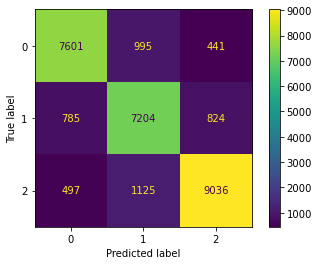

In [62]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

We achieved a higher accuracy score when we trained our model on all the data. So, let's use this dataset to train our remaining models. First, we have random forest, which is a combination of many decision trees.

In [120]:
param_grid = [
{
'vect__ngram_range': [(1, 1)],
'vect__stop_words': [None],
'vect__tokenizer': [tokenizer, tokenizer_porter]},
{
'vect__ngram_range': [(1, 1)],
'vect__stop_words': [stop, None],
'vect__tokenizer': [tokenizer],
'vect__use_idf':[False],
'vect__norm':[None]}
]

random_forest_tfidf = Pipeline([('vect', tfidf), ('clf', RandomForestClassifier())])

grid_search = GridSearchCV(random_forest_tfidf, param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time= 9.4min
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time= 9.7min
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time= 9.5min
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time= 9.6min
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time= 9.4min
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time= 8.9min
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time= 8.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=1,
             param_grid=[{'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [None],
                          'vect__tokenizer': [<function tokenizer at 0x7fbc905e8ca0>,
                                              <function tokenizer_porter at 0x7fbc905e8c10>]},
                         {'vect__ngram_range': [(1, 1)], 'vect__norm': [None],
                          'vec...': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                      

In [121]:
print(f'Best parameter set: {grid_search.best_params_}')

Best parameter set: {'vect__ngram_range': (1, 1), 'vect__norm': None, 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', '

Our accuracy score is lower than the accuracy score with logistic regression on the entire dataset--it is 89.3%, roughly 2 percentage points lower. The random forest model is even worse at "equal performances" throughout the three classes. For example, the recall score for books is only 40%. Thus, I prefer logistic regression over random forest.

In [122]:
clf = grid_search.best_estimator_
y_pred = clf.predict(X_test)
print("Classification Report: \n", classification_report(y_test,y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.40      0.54      8985
           1       0.90      0.99      0.94     87992
           2       0.89      0.55      0.68     10807

    accuracy                           0.89    107784
   macro avg       0.87      0.64      0.72    107784
weighted avg       0.89      0.89      0.88    107784

Accuracy Score:  0.8931659615527351


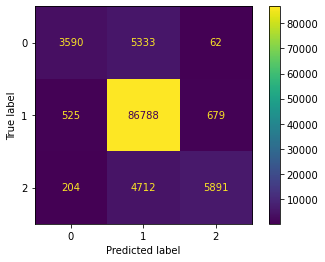

In [123]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Now, let us train an SVM model.

In [124]:
svm_tfidf = Pipeline([('vect', tfidf), ('clf', svm.SVC())])

grid_search = GridSearchCV(svm_tfidf, param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=105.5min
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=105.3min
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=104.8min
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=107.6min
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=120.9min
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time=101.7min
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total ti

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf', SVC())]),
             n_jobs=1,
             param_grid=[{'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [None],
                          'vect__tokenizer': [<function tokenizer at 0x7fbc905e8ca0>,
                                              <function tokenizer_porter at 0x7fbc905e8c10>]},
                         {'vect__ngram_range': [(1, 1)], 'vect__norm': [None],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                               

In [125]:
print(f'Best parameter set: {grid_search.best_params_}')

Best parameter set: {'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x7fbc905e8c10>}


The SVM model performs only slightly better than the logistic regression model. It has an accuracy score of 92.5%, which is only 0.3% higher than the logistic regression model, and has recall scores that are similar to the other model (65% for books). Thus, if I were to recommend a model for this task, I would choose either the SVM model or the logistic regression model.

In [126]:
clf = grid_search.best_estimator_
y_pred = clf.predict(X_test)
print("Classification Report: \n", classification_report(y_test,y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.65      0.74      8985
           1       0.93      0.99      0.96     87992
           2       0.97      0.63      0.77     10807

    accuracy                           0.93    107784
   macro avg       0.92      0.76      0.82    107784
weighted avg       0.93      0.93      0.92    107784

Accuracy Score:  0.9259166481110369


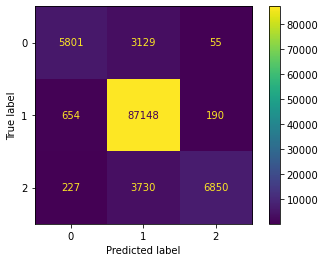

In [127]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Lastly, we train a Naive Bayes model.

In [133]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_tfidf = Pipeline([('vect', tfidf), ('clf', MultinomialNB())])

grid_search = GridSearchCV(naive_bayes_tfidf, param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   2.0s
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   1.9s
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   1.8s
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   1.9s
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   2.1s
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time=  51.1s
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time=  5

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf', MultinomialNB())]),
             n_jobs=1,
             param_grid=[{'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [None],
                          'vect__tokenizer': [<function tokenizer at 0x7fbc905e8ca0>,
                                              <function tokenizer_porter at 0x7fbc905e8c10>]},
                         {'vect__ngram_range': [(1, 1)], 'vect__norm': [None],
                          'vect__stop_w...': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                      

In [134]:
print(f'Best parameter set: {grid_search.best_params_}')

Best parameter set: {'vect__ngram_range': (1, 1), 'vect__norm': None, 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', '

The Naive Bayes model is slightly worse than the SVM and logistic regression models; it has an accuracy score of 90%. At the same time, its classification report looks very similar to those of the mentioned models. For example, the recall score for books is 62%. Thus, I would not prefer this model over the SVM or logistic regression models.

In [135]:
clf = grid_search.best_estimator_
y_pred = clf.predict(X_test)
print("Classification Report: \n", classification_report(y_test,y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.62      0.70      8985
           1       0.92      0.97      0.95     87992
           2       0.78      0.59      0.67     10807

    accuracy                           0.90    107784
   macro avg       0.83      0.73      0.77    107784
weighted avg       0.90      0.90      0.90    107784

Accuracy Score:  0.9035200029689008


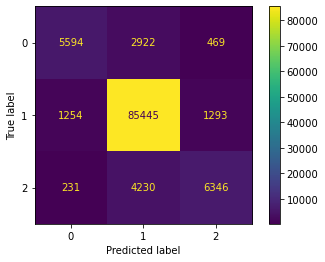

In [136]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Notice that Class 1 (dialogue from movies) has a significantly higher quantity of data. Let's see how much the classes are imbalanced, and edit the dataframe to achieve balanced classes. We'll use the naive bayes model, simply because it was one of the faster models.

In [138]:
df_all['type'].value_counts()

1    293614
2     35664
0     29999
Name: type, dtype: int64

In [177]:
# Let's divide the Movies class by a factor of 10, so that the classes are relatively balanced.
df_movies = df_movies.sample(n = int(len(df_movies)/10))
df_movies = df_movies.reset_index()


In [178]:
df_movies = df_movies.drop(df_movies.iloc[:, 0:1],axis = 1)
df_movies.head()

,0,1
0,The same thing.,1
1,On his death bed I promised Marcus I would com...,1
2,You can't remember that -- !,1
3,Stop it.,1
4,This is the chance you've been waiting for boy...,1


In [179]:
df_all = pd.concat([df_books, df_movies, df_games], ignore_index=True)
df_all = df_all.sample(n = len(df_all))
df_all.rename(columns = {0:'line', 1: 'type'}, inplace = True)
df_all['line'] = df_all['line'].astype(str)
df_all['line'] = df_all['line'].apply(preprocessor)
df_all.tail()

,line,type
37573,i bet you like sittin between two men in a dua...,1
41069,she s not that either,1
80426,gerlon losing to a rookie is this a sign that ...,2
50366,it s going to be a long night it could take ho...,1
40942,the problem is i don t happen to think my son ...,1


In [180]:
X = df_all['line'].values
y = df_all['type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [181]:
df_all['type'].value_counts()

2    35664
0    29999
1    29361
Name: type, dtype: int64

In [182]:
naive_bayes_tfidf = Pipeline([('vect', tfidf), ('clf', MultinomialNB())])

grid_search = GridSearchCV(naive_bayes_tfidf, param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.9s
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.9s
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.9s
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.9s
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer at 0x7fbc905e8ca0>; total time=   0.9s
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time=  28.3s
[CV] END vect__ngram_range=(1, 1), vect__stop_words=None, vect__tokenizer=<function tokenizer_porter at 0x7fbc905e8c10>; total time=  2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf', MultinomialNB())]),
             n_jobs=1,
             param_grid=[{'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [None],
                          'vect__tokenizer': [<function tokenizer at 0x7fbc905e8ca0>,
                                              <function tokenizer_porter at 0x7fbc905e8c10>]},
                         {'vect__ngram_range': [(1, 1)], 'vect__norm': [None],
                          'vect__stop_w...': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                      

In [183]:
print(f'Best parameter set: {grid_search.best_params_}')

Best parameter set: {'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x7fbc905e8c10>}


The accuracy score is much worse than the other models--it is 78.1%. However, it succeeds in performing "equally across classes." The classification report shows that it is does not falter with a specific class or instance (such as predicting false negatives).

In [184]:
clf = grid_search.best_estimator_
y_pred = clf.predict(X_test)
print("Classification Report: \n", classification_report(y_test,y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      9071
           1       0.84      0.60      0.70      8688
           2       0.72      0.91      0.80     10749

    accuracy                           0.78     28508
   macro avg       0.80      0.77      0.77     28508
weighted avg       0.79      0.78      0.78     28508

Accuracy Score:  0.7819910200645432


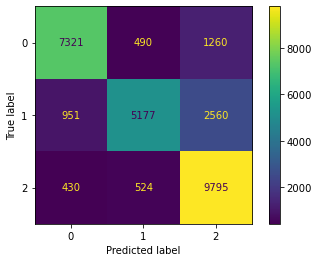

In [185]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Thus, the best model was the support vector machine, which had an accuracy score of 92.5%. The logistic regression model was a close second, with an accuracy score of 92.3%. As expected, the models performed better when they were trained on the entire dataset. However, what surprised me was the fact that the Naive Bayes model performed worse on a balanced subset (accuracy score: 78.1%) than on the entire dataset (accuracy score: 90.3%). I did not expect that removing one-tenth of the data from the movie dataset would impact the accuracy score so much.

Moreover, the classification report for the Naive Bayes model on the balanced subset shows that the model performs equally well on all three classes. This would be ideal in "life-or-death" situations, such as in the world of healthcare, but is not needed when it comes to predicting the entertainment type of a quote. Thus, for this task, I would reccommend training the SVM model on the entire dataset.

In the future, I hope to test all of the hyperparameters in gridsearch. (I did attempt to use Amherst's new cluster for my final project, but the kernel ran out of memory.) Thus, I would be able to exhaust all possibilities, and can truly know that the accuracy score is the highest it can be.

In the future, I also hope to train and test my models on more data. I noticed that my video-game data were all based in fantastical video games, while my book and film data came from a variety of genres. I wonder if this imbalance affected my models. In order to answer this question, I hope to find more video game dialogue that spans all genres. I also hope to find more book dialogue, to see if the recall and precision scores would improve once I had a balanced dataset.

It would also be interesting to include video games, books, and movies of the same subject matter (such as Star Wars or Harry Potter) to see if the model can distinguish between them.  

Finally, if I had additional time, I would like to test the HAN model, which Shahin used in his thesis. 

**Ultimately, using machine learning, we can conclude that there is a discernable difference between books, movies, and video games. The social impact of my final project supports the age-old parental preference of books over movies and video games, and provides a more objective (as a model is not emotionally involved in the lives of humans)reason to this preference (even though there is bias in my data, as stated above).**